# Time to get your hands dirty. Handwritten digits.
Sometimes you might want to apply multiple ML techniques. For example, just because you have labels in your training data doesn't mean that a regression algorithm will work very well. So, you might want to start with a clustering or dimensional reduction algorithm first.

The goal here it's to familiarize yourself with sklearn and the key ideas behind machine learning. So no worries it's ok if you don't understand the details of the algorithms right now, you'll get them in a few weeks.

Here we're going to use the MNIST database. This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face.

Let's load the dataset first.

## Tasks. Part 0
1. First thing, grab a piece of paper and visually classify those 25 digits. We'll see if you're better or worse than a computer!
Spoiler alert: Davide's efficiency was ~80%, much worse than ML!

2. Here is how you plot the images and the corresponding labels (The one thing I'm not telling you of course is the random seed I used to select those above). After you've seen this ones, go back to your piece of paper and update your choices if you want. Keep track of both set of preditions. This is like supervised learning.

## Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N = 64$ dimensions! So we need to reduce the dimensionality of the space.

3. Use the unsupervised dimensionality reduction technique called **Isomap**. Isomap is an embedding technique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N < M$) manyfold. Reduce the MNIST dataset. Do some plots to visualize your results.

*Note.* Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://citations?view_op=view_citation&hl=en&user=fXX5cFQAAAAJ&citation_for_view=fXX5cFQAAAAJ:u5HHmVD_uO8C) --- a paper that has something like $1.5 \times 10^4$ citations.

---

## Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset.

4. Split the dataset taking 80% of the images as training dataset and leaving the other 20% as a validation set. You need  
   ```python
   sklearn.model_selection.train_test_split

5. Use a simple `LogisticRegression` which despite its name is a common classification algorithm. (I know, this is confusing!).  
   Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6. Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator.  
   In this context, accuracy is simply the fraction of the digits that were correctly identified.  
   Compute the accuracy on both the training and the validation set. Comment on the results.

7. The accuracy is a single number that doesn't tell us *where* we've gone wrong.  
   Plot the **confusion matrix** as we did above. What are the digits that are more challenging to identify?  
   Does it make sense?

There are many ways to improve this classifier, for example using a more sophisticated model,  
use cross validation, etc. We'll get to those in the coming weeks.



In [41]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
digits = datasets.load_digits() #load the data
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [11]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

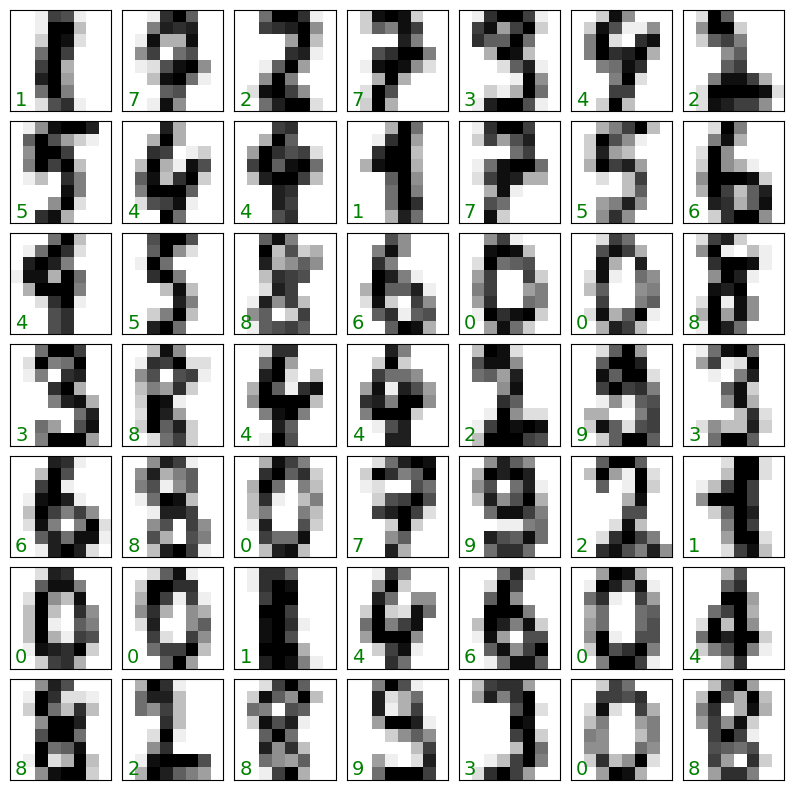

In [ ]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],1000) # Select 1000 random indices for the images

# Loop through the grid of subplots and display random digit images with labels
for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
#Isomap reduces dimensionality while preserving the non-linear geometric structure of the data. 
# It first constructs a graph with points connected to their nearest neighbors. 
# Then, it computes geodesic distances between points using a shortest-path algorithm. 
# Finally, it applies Multidimensional Scaling (MDS) to reduce the dimensionality, preserving the geodesic distances in the lower-dimensional space.
X=digits.data[mychoices]
embedding = Isomap(n_components=2) # Reduce to 2 dimensions (2D)
X_transformed = embedding.fit_transform(X)
print(X_transformed.shape)


/home/sara/myenv/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/sara/myenv/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sara/myenv/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
/home/sara/myenv/lib/python3.10/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1000, 2)


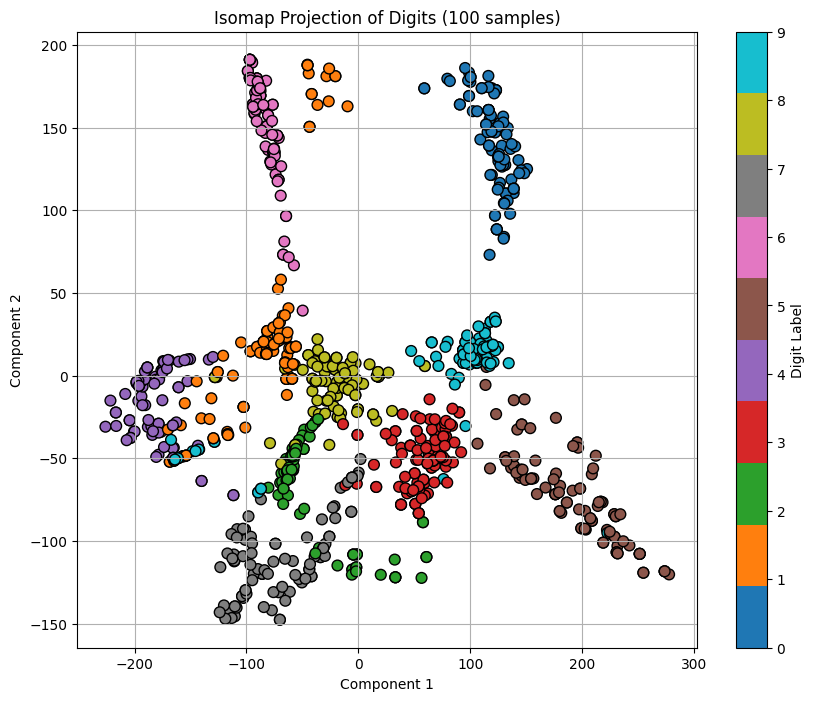

In [27]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=digits.target[mychoices], cmap='tab10', edgecolor='k', s=60)
plt.colorbar(scatter, ticks=range(10), label='Digit Label')
plt.title('Isomap Projection of Digits (100 samples)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()


In [ ]:
x, y = digits.data, digits.target  
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.8)  # Split the data with 80% for training and 20% for testing

In [ ]:
model = LogisticRegression(solver='sag') #the model used
model.fit(xtrain,ytrain)  # Train the model using the training data

/home/sara/myenv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [45]:
# Predict the labels on the test set and training set
ypredtest=model.predict(xtest) 
ypredtrain=model.predict(xtrain)

# Calculate accuracy for both training and test sets
acc_train=accuracy_score(ytrain,ypredtrain)
acc_test=accuracy_score(ytest,ypredtest)
print("Accuracy for training set",acc_train)
print("Accuracy for test set",acc_test)


Accuracy for training set 1.0
Accuracy for test set 0.9457579972183588


In [48]:
print("Confusion matrix for test set\n",confusion_matrix(ytest, ypredtest))

Confusion matrix for test set
 [[141   0   0   0   1   0   0   0   0   0]
 [  0 144   0   0   0   1   1   0   4   2]
 [  0   0 132   0   0   0   0   0   0   0]
 [  0   0   6 136   0   2   0   0   6   3]
 [  0   0   0   0 140   0   0   5   3   1]
 [  1   1   0   1   1 136   1   0   1   1]
 [  0   0   0   0   0   1 135   0   1   0]
 [  1   0   0   0   0   0   0 135   4   0]
 [  0   7   3   0   0   2   0   0 130   0]
 [  0   3   0   0   0   2   0   3   9 131]]


In [50]:
print("Confusion matrix for training set\n",confusion_matrix(ytrain, ypredtrain))

Confusion matrix for training set
 [[36  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  0  0]
 [ 0  0 45  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  0 32]]
